In [1]:
import numpy as np
from numpy import exp

import matplotlib.pyplot as plt

In [2]:
N = 20 # of spins in the model

L = 500 # of trial spin flips

w = 1/N # trial probability

In [3]:
conf = np.ones(N) # in the initial configuration all spins are up

J = 1

E0 = -J * (sum([conf[i]*conf[i+1] for i in np.arange(N-1)]) + conf[-1]*conf[1]) # initial energy

In [4]:
E0

-20.0

In [5]:
def energy(spins, i):
    
    if i == 0:
        return -J* (spins[0]*spins[1] + spins[0]*spins[-1]) 
    
    if i == len(spins) - 1:
        return -J* (spins[i]*spins[i-1] + spins[i]*spins[0])
    
    else:
        return -J* (spins[i+1]*spins[i] + spins[i-1]*spins[i])

In [6]:
def Metropolis(Beta, spins, w, L):
    
    N = len(spins)
    dE = []
   
    states = np.zeros((L+1, N))
    
    states[0, :] = spins
    
    
    for j in range(L):
     

        if L == 0:
            break

        i = np.random.choice(np.arange(0, N), p = np.full(N, w))

        E = energy(spins, i)

        spins[i] = -1 * spins[i]

        E_prime = energy(spins, i) 

        A = min([1, exp(-1/Beta * (E_prime-E))])

        #print(exp(-Beta * (E_prime-E)))

        res = np.random.choice([1, -1], p = [A, 1 - A])

        spins[i] = res * spins[i]

        if res == 1:
            dE.append( E_prime - E )
        else:
            dE.append(0)
           
        L = L-1
        states[j+1, :] = spins
    return dE, states

In [7]:
conf = np.ones(N)
dE, state = Metropolis(1, conf, w, L)

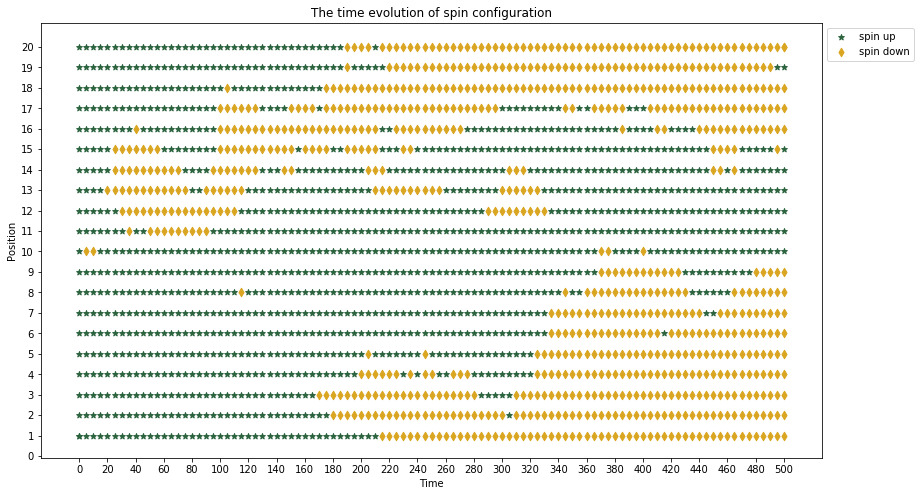

In [8]:
plt.figure(figsize=(14,8))

plt.yticks(np.arange(0,N+1, 1))
plt.xticks(np.arange(0,L+1, 20))
plt.xlabel('Time')
plt.ylabel('Position')

for i in range(N):
    for j in range(0, L+1, 5):
        if state[j, i] == 1:
            
            plt.scatter(j, i+1, marker = '*', color = '#2a623d')
            
        else:
            plt.scatter(j, i+1, marker = 'd', color = 'goldenrod')
            xx = j
            yy = i+1


plt.scatter(0,1, marker = '*', color = '#2a623d', label = "spin up")

plt.scatter(xx,yy, marker = 'd', color = 'goldenrod', label = "spin down")

plt.title('The time evolution of spin configuration')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('1a.png', bbox_inches='tight')

## b) $k_B T = 0, 1, 10$

In [9]:
#b)
# k*T = 0.1, 1, 10

L = 1000


conf = np.ones(N)
Beta1 = 0.1
dE1, state1 = Metropolis(Beta1, conf, w, L)

conf = np.ones(N)
Beta2 = 1
dE2, state2 = Metropolis(Beta2, conf,w, L)


conf = np.ones(N)
Beta3 = 10
dE3, state3 = Metropolis(Beta3, conf, w, L)



In [10]:
def count_E(dE):
    E = []
    E.append(E0)
    for i in range(len(dE)):
        E.append(E[-1]+dE[i])
    return E

In [11]:
EE1 = count_E(dE1)
EE2 = count_E(dE2)
EE3 = count_E(dE3)

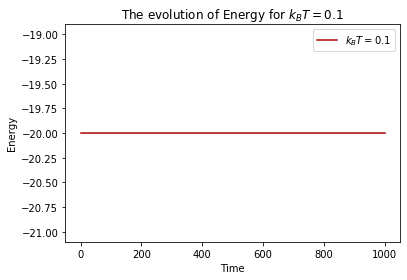

In [12]:
plt.plot(np.arange(0, L+1), EE1, label = f'$k_B T = ${Beta1}', color = '#AE0001')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('The evolution of Energy for $k_B T = 0.1$')
plt.legend()

plt.savefig('1b1.png', bbox_inches='tight')

plt.show()

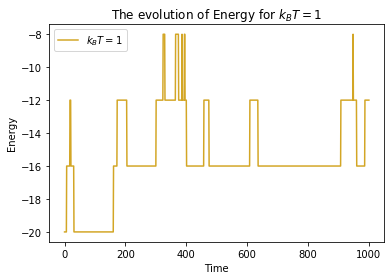

In [13]:
plt.plot(np.arange(0, L+1), EE2, label = f'$k_B T = ${Beta2}', color = '#D3A625')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('The evolution of Energy for $k_B T = 1$')
plt.legend()

plt.savefig('1b2.png', bbox_inches='tight')
plt.show()

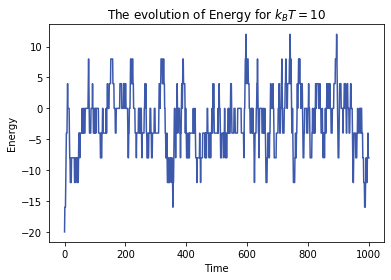

In [14]:
plt.plot(np.arange(0, L+1), EE3, color = '#3D59AB')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('The evolution of Energy for $k_B T = 10$')
plt.savefig('1b3.png', bbox_inches='tight')
plt.show()

In [15]:
L = 1000
conf = np.ones(N)

M = 100

dE_M1 = np.zeros((M, L))
dE_M2 = np.zeros((M, L))
dE_M3 = np.zeros((M, L))

for i in range(M):
    conf = np.ones(N)
    dE_M1[i] = Metropolis(Beta1, conf, w, L)[0]
    
    conf = np.ones(N)
    dE_M2[i] = Metropolis(Beta2, conf, w, L)[0]
    
    conf = np.ones(N)
    dE_M3[i] = Metropolis(Beta3, conf, w, L)[0]

In [16]:
EE_M1 = []
EE_M2 = []
EE_M3 = []
for i in range(M):
    EE_M1.append(count_E(dE_M1[i, :]))
    EE_M2.append(count_E(dE_M2[i, :]))
    EE_M3.append(count_E(dE_M3[i, :]))

In [17]:
E_ave_1 = np.average(EE_M1, axis=0)
E_ave_2 = np.average(EE_M2, axis=0)
E_ave_3 = np.average(EE_M3, axis=0)

In [18]:
errorE_1 = np.std(EE_M1, axis = 0) /np.sqrt(M)
errorE_2 = np.std(EE_M2, axis = 0) /np.sqrt(M)
errorE_3 = np.std(EE_M3, axis = 0) /np.sqrt(M)

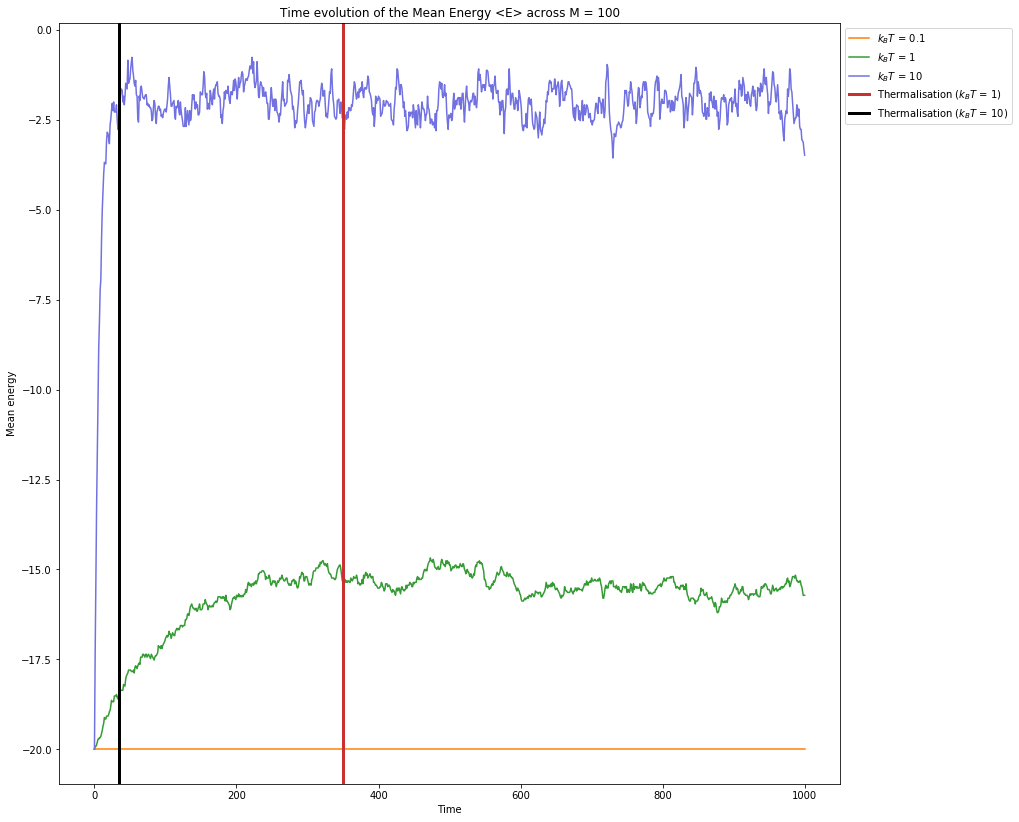

In [19]:
plt.figure(figsize=(14,14))
plt.plot(np.arange(0, L+1), E_ave_1, label = r'$k_B T$' f' = {Beta1}', color = '#FF8000') 
plt.plot(np.arange(0, L+1), E_ave_2, label = r'$k_B T$' f' = {Beta2}', color = '#359c35') 
plt.plot(np.arange(0, L+1), E_ave_3, label = r'$k_B T$' f' = {Beta3}', color = '#7171e1') 


plt.axvline(350, label = r'Thermalisation ($k_B T$' f' = {Beta2})', color = '#cb3030', linewidth='3')
plt.axvline(35, label = r'Thermalisation ($k_B T$' f' = {Beta3})', color = 'black', linewidth='3')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Time')
plt.ylabel('Mean energy')
plt.title('Time evolution of the Mean Energy <E> across M = 100')

plt.savefig('1b4.png', bbox_inches='tight')

plt.show()

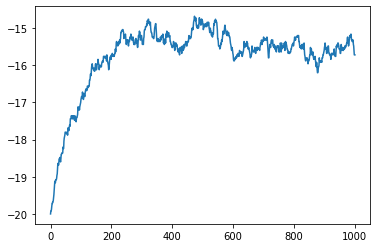

In [20]:
plt.plot(np.arange(0, L+1), E_ave_2[0:], label = r'$\beta$' f' = {Beta2}') 

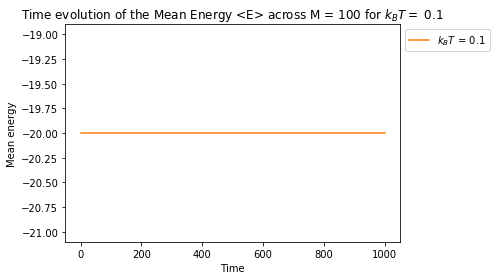

In [21]:
plt.plot(np.arange(0, L+1), E_ave_1, label = r'$k_B T$' f' = {Beta1}', color = '#FF8000') 

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Time')
plt.ylabel('Mean energy')
plt.title(f'Time evolution of the Mean Energy <E> across M = 100 for $k_B T =$ {Beta1}')

plt.savefig('1b5.png', bbox_inches='tight')

plt.show()

Beta = 0.1 does not change much, as available energy is low. Comment about heat bath, etc. 

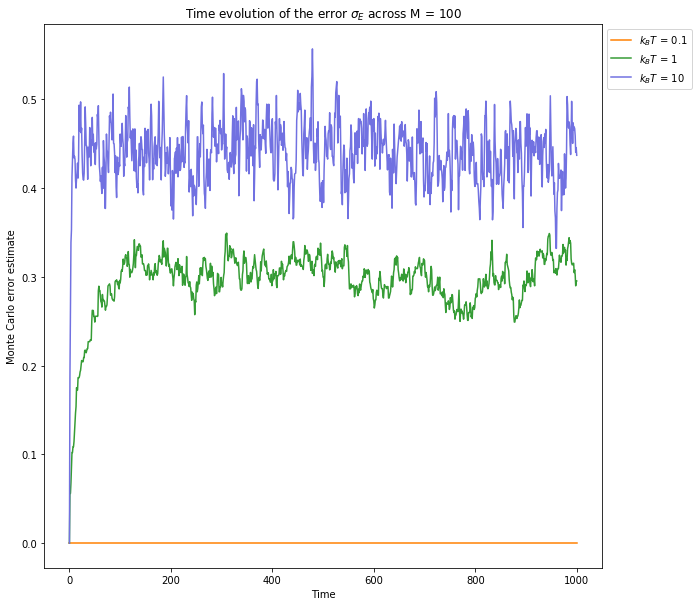

In [22]:
plt.figure(figsize=(10,10))

plt.plot(np.arange(0, L+1), errorE_1, label = r'$k_B T$' f' = {Beta1}', color = '#FF8000') 
plt.plot(np.arange(0, L+1), errorE_2, label = r'$k_B T$' f' = {Beta2}', color = '#359c35') 
plt.plot(np.arange(0, L+1), errorE_3, label = r'$k_B T$' f' = {Beta3}', color = '#7171e1') 


plt.xlabel('Time')
plt.ylabel('Monte Carlo error estimate')
plt.title('Time evolution of the error $\sigma_E$ across M = 100')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('1b6.png', bbox_inches='tight')
plt.show()

## c)

In [23]:
def meanE_t(spins):
    
    return 1/len(spins) * np.average(spins)

In [24]:
L = 1000
M = 100

conf = np.ones(N)

# dE_M_1 = np.zeros((M, L))
# dE_M_2 = np.zeros((M, L))
# dE_M_3 = np.zeros((M, L))
# dE_M_4 = np.zeros((M, L))
# dE_M_5 = np.zeros((M, L))
# dE_M_6 = np.zeros((M, L))
# dE_M_7 = np.zeros((M, L))
# dE_M_8 = np.zeros((M, L))
# dE_M_9 = np.zeros((M, L))
# dE_M_10 = np.zeros((M, L))

dE_M_100_1 = np.zeros((M, L))
dE_M_100_2 = np.zeros((M, L))
dE_M_100_3 = np.zeros((M, L))
dE_M_100_4 = np.zeros((M, L))
dE_M_100_5 = np.zeros((M, L))
dE_M_100_6 = np.zeros((M, L))
dE_M_100_7 = np.zeros((M, L))
dE_M_100_8 = np.zeros((M, L))
dE_M_100_9 = np.zeros((M, L))
dE_M_100_10 = np.zeros((M, L))

for i in range(M):
    conf = np.ones(N)
    dE_M_100_1[i] = Metropolis(1, conf, w, L)[0]
    
    conf = np.ones(N)
    dE_M_100_2[i] = Metropolis(2, conf, w, L)[0]
    
    conf = np.ones(N)
    dE_M_100_3[i] = Metropolis(3, conf, w, L)[0]
    
    conf = np.ones(N)
    dE_M_100_4[i] = Metropolis(4, conf, w, L)[0]
    
    conf = np.ones(N)
    dE_M_100_5[i] = Metropolis(5, conf, w, L)[0]
    
    conf = np.ones(N)
    dE_M_100_6[i] = Metropolis(6, conf, w, L)[0]
    
    conf = np.ones(N)
    dE_M_100_7[i] = Metropolis(7, conf, w, L)[0]
    
    conf = np.ones(N)
    dE_M_100_8[i] = Metropolis(8, conf, w, L)[0]
    
    conf = np.ones(N)
    dE_M_100_9[i] = Metropolis(9, conf, w, L)[0]
    
    conf = np.ones(N)
    dE_M_100_10[i] = Metropolis(10, conf, w, L)[0]

In [25]:
EE_M1 = np.zeros((M, L+1))
EE_M2 = np.zeros((M, L+1))
EE_M3 = np.zeros((M, L+1))
EE_M4 = np.zeros((M, L+1))
EE_M5 = np.zeros((M, L+1))
EE_M6 = np.zeros((M, L+1))
EE_M7 = np.zeros((M, L+1))
EE_M8 = np.zeros((M, L+1))
EE_M9 = np.zeros((M, L+1))
EE_M10 = np.zeros((M, L+1))

for i in range(M):
    EE_M1[i] = count_E(dE_M_100_1[i])
    EE_M2[i] = count_E(dE_M_100_2[i])
    EE_M3[i] = count_E(dE_M_100_3[i])
    EE_M4[i] = count_E(dE_M_100_4[i])
    EE_M5[i] = count_E(dE_M_100_5[i])
    EE_M6[i] = count_E(dE_M_100_6[i])
    EE_M7[i] = count_E(dE_M_100_7[i])
    EE_M8[i] = count_E(dE_M_100_8[i])
    EE_M9[i] = count_E(dE_M_100_9[i])
    EE_M10[i] = count_E(dE_M_100_10[i]) 

In [26]:
mean_E_M_t1 = 1/N*np.average(EE_M1, axis=1)
mean_E_M_t2 = 1/N*np.average(EE_M2, axis=1)
mean_E_M_t3 = 1/N*np.average(EE_M3, axis=1)
mean_E_M_t4 = 1/N*np.average(EE_M4, axis=1)
mean_E_M_t5 = 1/N*np.average(EE_M5, axis=1)
mean_E_M_t6 = 1/N*np.average(EE_M6, axis=1)
mean_E_M_t7 = 1/N*np.average(EE_M7, axis=1)
mean_E_M_t8 = 1/N*np.average(EE_M8, axis=1)
mean_E_M_t9 = 1/N*np.average(EE_M9, axis=1)
mean_E_M_t10 = 1/N*np.average(EE_M10, axis=1)

In [27]:
mean1 = np.average(mean_E_M_t1)
mean2 = np.average(mean_E_M_t2)
mean3 = np.average(mean_E_M_t3)
mean4 = np.average(mean_E_M_t4)
mean5 = np.average(mean_E_M_t5)
mean6 = np.average(mean_E_M_t6)
mean7 = np.average(mean_E_M_t7)
mean8 = np.average(mean_E_M_t8)
mean9 = np.average(mean_E_M_t9)
mean10 = np.average(mean_E_M_t10)

In [28]:
x_M = [mean1,mean2, mean3, mean4, mean5, mean6, mean7, mean8, mean9, mean10] 

In [29]:
Beta = np.arange(1, 11, 1)

In [30]:
def analytical(Beta):
    return (-J) * np.tanh(J/Beta)

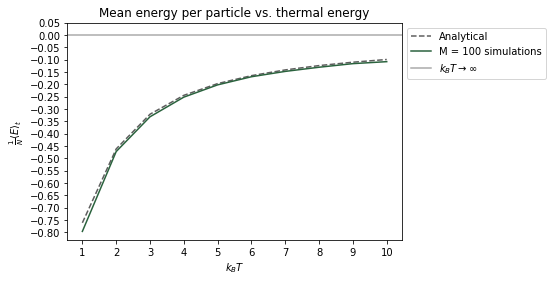

In [31]:
plt.plot(Beta, analytical(Beta), ls = '--', color = '#5d5d5d', label = 'Analytical')
plt.plot(Beta, x_M, color = '#2a623d', label = 'M = 100 simulations')



plt.ylabel(r'$\frac{1}{N}\langle E \rangle_t$')
plt.xlabel('$k_B T$')
plt.title('Mean energy per particle vs. thermal energy')

plt.yticks(np.arange(-0.8, 0.06, 0.05))
plt.xticks(Beta)


plt.axhline(0, color = '#aaaaaa', label = r'$k_B T \rightarrow \infty$')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('1c.png', bbox_inches='tight')
plt.show()

## d)

In [32]:
C_M_V1 = (np.std(EE_M1))**2/(1)**2
C_M_V2 = (np.std(EE_M2))**2/(2)**2
C_M_V3 = (np.std(EE_M3))**2/(3)**2
C_M_V4 = (np.std(EE_M4))**2/(4)**2
C_M_V5 = (np.std(EE_M5))**2/(5)**2
C_M_V6 = (np.std(EE_M6))**2/(6)**2
C_M_V7 = (np.std(EE_M7))**2/(7)**2
C_M_V8 = (np.std(EE_M8))**2/(8)**2
C_M_V9 = (np.std(EE_M9))**2/(9)**2
C_M_V10 = (np.std(EE_M10))**2/(10)**2


In [33]:
c_M_V = [C_M_V1, C_M_V2, C_M_V3, C_M_V4, C_M_V5, C_M_V6, C_M_V7, C_M_V8, C_M_V9, C_M_V10]
c_M_V = [i * 1/N for i in c_M_V]

In [34]:
def analytical_c_V(Beta):
    return (J/Beta)**2/(np.cosh(J/Beta))**2

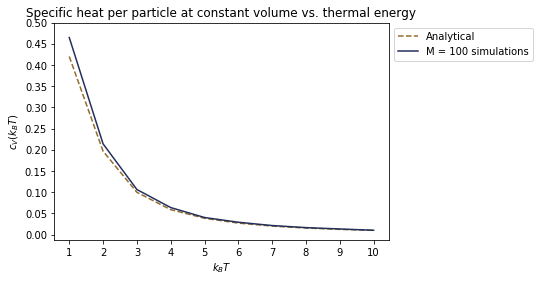

In [35]:
plt.plot(Beta, analytical_c_V(Beta), label='Analytical', color = '#946b2d', ls = '--')
plt.plot(Beta, c_M_V, color = '#222f5b', label = 'M = 100 simulations') 

plt.yticks(np.arange(0,0.55, 0.05))
plt.xticks(Beta)



plt.ylabel(r'$c_V(k_B T)$')
plt.xlabel('$k_B T$')
plt.title('Specific heat per particle at constant volume vs. thermal energy')


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('1d.png', bbox_inches='tight')

plt.show()

## e)

In [36]:
def Mag(spins):
    return np.sum(spins)

In [37]:
def ana_Mag(Beta, H):
    return np.exp(J/Beta)*np.sinh(H/Beta)/np.sqrt(np.exp(2*J/Beta)*(np.sinh(H/Beta))**2 + np.exp(-2*J/Beta))

In [38]:
def energy_H(spins, i):
    
    if i == 0:
        return -J* (spins[0]*spins[1] + spins[0]*spins[-1]) - H * spins[0] 
    
    if i == len(spins) - 1:
        return -J* (spins[i]*spins[i-1] + spins[i]*spins[0]) - H * spins[i]
    
    else:
        return -J* (spins[i+1]*spins[i] + spins[i-1]*spins[i]) - H *spins[i]

In [39]:
def Metropolis_H(Beta, spins, w, L, H):
    
    N = len(spins)
    dE = []
    
    states = np.zeros((L+1, N))
    
    states[0, :] = spins
    
    
    for j in range(L):
     
        if L == 0:
            break

        i = np.random.choice(np.arange(0, N), p = np.full(N, w))

        E = energy_H(spins, i)

        spins[i] = -1 * spins[i]

        E_prime = energy_H(spins, i) 

        A = min([1, exp(-1/Beta * (E_prime-E))])

        

        res = np.random.choice([1, -1], p = [A, 1 - A])

        spins[i] = res * spins[i]

        if res == 1:
            dE.append( E_prime - E )
        else:
            dE.append(0)
           
        L = L-1
        states[j+1, :] = spins
    return states

In [57]:
L = 1000
M = 100

conf = np.ones(N)

# dE_M_1 = np.zeros((M, L))
# dE_M_2 = np.zeros((M, L))
# dE_M_3 = np.zeros((M, L))
# dE_M_4 = np.zeros((M, L))
# dE_M_5 = np.zeros((M, L))
# dE_M_6 = np.zeros((M, L))
# dE_M_7 = np.zeros((M, L))
# dE_M_8 = np.zeros((M, L))
# dE_M_9 = np.zeros((M, L))
# dE_M_10 = np.zeros((M, L))

spinsM1 = np.zeros((M, N))
spinsM2 = np.zeros((M, N))
spinsM3 = np.zeros((M, N))
spinsM4 = np.zeros((M, N))
spinsM5 = np.zeros((M, N))
spinsM6 = np.zeros((M, N))
spinsM7 = np.zeros((M, N))
spinsM8 = np.zeros((M, N))
spinsM9 = np.zeros((M, N))
spinsM10 = np.zeros((M, N))

for i in range(M):
    conf = np.ones(N)
    spinsM1[i] = Metropolis(1, conf, w, L)[1][-1]
    
    conf = np.ones(N)
    spinsM2[i] = Metropolis(2, conf, w, L)[1][-1]
    
    conf = np.ones(N)
    spinsM3[i] = Metropolis(3, conf, w, L)[1][-1]
    
    conf = np.ones(N)
    spinsM4[i] = Metropolis(4, conf, w, L)[1][-1]
    
    conf = np.ones(N)
    spinsM5[i] = Metropolis(5, conf, w, L)[1][-1]
    
    conf = np.ones(N)
    spinsM6[i] = Metropolis(6, conf, w, L)[1][-1]
    
    conf = np.ones(N)
    spinsM7[i] = Metropolis(7, conf, w, L)[1][-1]
    
    conf = np.ones(N)
    spinsM8[i] = Metropolis(8, conf, w, L)[1][-1]
    
    conf = np.ones(N)
    spinsM9[i] = Metropolis(9, conf, w, L)[1][-1]
    
    conf = np.ones(N)
    spinsM10[i] = Metropolis(10, conf, w, L)[1][-1]

In [58]:
Magnet1 = []
Magnet2 = []
Magnet3 = []
Magnet4 = []
Magnet5 = []
Magnet6 = []
Magnet7 = []
Magnet8 = []
Magnet9 = []
Magnet10 = []

for i in range(M):
    Magnet1.append(Mag(spinsM1[i]))
    Magnet2.append(Mag(spinsM2[i]))
    Magnet3.append(Mag(spinsM3[i]))
    Magnet4.append(Mag(spinsM4[i]))
    Magnet5.append(Mag(spinsM5[i]))
    Magnet6.append(Mag(spinsM6[i]))
    Magnet7.append(Mag(spinsM7[i]))
    Magnet8.append(Mag(spinsM8[i]))
    Magnet9.append(Mag(spinsM9[i]))
    Magnet10.append(Mag(spinsM10[i]))

In [59]:
Magnet1_ave = np.average(Magnet1)
Magnet2_ave = np.average(Magnet2)
Magnet3_ave = np.average(Magnet3)
Magnet4_ave = np.average(Magnet4)
Magnet5_ave = np.average(Magnet5)
Magnet6_ave = np.average(Magnet6)
Magnet7_ave = np.average(Magnet7)
Magnet8_ave = np.average(Magnet8)
Magnet9_ave = np.average(Magnet9)
Magnet10_ave = np.average(Magnet10)

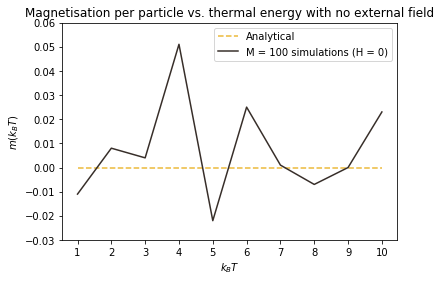

In [61]:
m = [Magnet1_ave, Magnet2_ave, Magnet3_ave, Magnet4_ave, Magnet5_ave, Magnet6_ave, Magnet7_ave, Magnet8_ave, Magnet9_ave, Magnet10_ave]  

m_x = [i * 1/N for i in m]

plt.plot(Beta, ana_Mag(Beta, 0), label='Analytical', ls = '--', color = '#ecb939')
plt.plot(Beta, m_x, label = 'M = 100 simulations (H = 0)', color = '#372e29') 
plt.title('Magnetisation per particle vs. thermal energy with no external field')

plt.xlabel('$k_B T$')
plt.ylabel('$m(k_B T)$')

plt.yticks(np.arange(-0.03, 0.065, 0.01))
plt.xticks(Beta)

plt.legend()

plt.savefig('1e1.png', bbox_inches='tight')
plt.show()

In [44]:
L = 1000
M = 100

H = 0.1

conf = np.ones(N)

spinsM1_H1 = np.zeros((M, N))
spinsM2_H1 = np.zeros((M, N))
spinsM3_H1 = np.zeros((M, N))
spinsM4_H1 = np.zeros((M, N))
spinsM5_H1 = np.zeros((M, N))
spinsM6_H1 = np.zeros((M, N))
spinsM7_H1 = np.zeros((M, N))
spinsM8_H1 = np.zeros((M, N))
spinsM9_H1 = np.zeros((M, N))
spinsM10_H1 = np.zeros((M, N))


for i in range(M):
    conf = np.ones(N)
    spinsM1_H1[i] = Metropolis_H(1, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM2_H1[i] = Metropolis_H(2, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM3_H1[i] = Metropolis_H(3, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM4_H1[i] = Metropolis_H(4, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM5_H1[i] = Metropolis_H(5, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM6_H1[i] = Metropolis_H(6, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM7_H1[i] = Metropolis_H(7, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM8_H1[i] = Metropolis_H(8, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM9_H1[i] = Metropolis_H(9, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM10_H1[i] = Metropolis_H(10, conf, w, L, H)[-1]

In [45]:
Magnet1_H1 = []
Magnet2_H1 = []
Magnet3_H1 = []
Magnet4_H1 = []
Magnet5_H1 = []
Magnet6_H1 = []
Magnet7_H1 = []
Magnet8_H1 = []
Magnet9_H1 = []
Magnet10_H1 = []

for i in range(M):
    Magnet1_H1.append(Mag(spinsM1_H1[i]))
    Magnet2_H1.append(Mag(spinsM2_H1[i]))
    Magnet3_H1.append(Mag(spinsM3_H1[i]))
    Magnet4_H1.append(Mag(spinsM4_H1[i]))
    Magnet5_H1.append(Mag(spinsM5_H1[i]))
    Magnet6_H1.append(Mag(spinsM6_H1[i]))
    Magnet7_H1.append(Mag(spinsM7_H1[i]))
    Magnet8_H1.append(Mag(spinsM8_H1[i]))
    Magnet9_H1.append(Mag(spinsM9_H1[i]))
    Magnet10_H1.append(Mag(spinsM10_H1[i]))

In [46]:
Magnet1_ave_H1 = np.average(Magnet1_H1)
Magnet2_ave_H1 = np.average(Magnet2_H1)
Magnet3_ave_H1 = np.average(Magnet3_H1)
Magnet4_ave_H1 = np.average(Magnet4_H1)
Magnet5_ave_H1 = np.average(Magnet5_H1)
Magnet6_ave_H1 = np.average(Magnet6_H1)
Magnet7_ave_H1 = np.average(Magnet7_H1)
Magnet8_ave_H1 = np.average(Magnet8_H1)
Magnet9_ave_H1 = np.average(Magnet9_H1)
Magnet10_ave_H1 = np.average(Magnet10_H1)

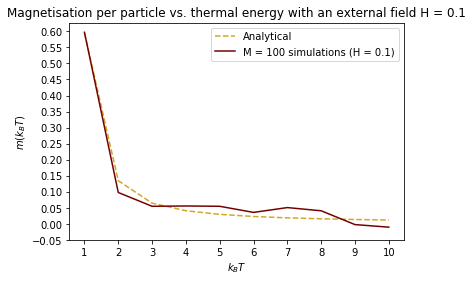

In [47]:
m_H1 = [Magnet1_ave_H1, Magnet2_ave_H1, Magnet3_ave_H1, Magnet4_ave_H1, Magnet5_ave_H1, Magnet6_ave_H1, Magnet7_ave_H1, Magnet8_ave_H1, Magnet9_ave_H1, Magnet10_ave_H1]  

m_x_H1 = [i * 1/N for i in m_H1]

plt.plot(Beta, ana_Mag(Beta, 0.1), label='Analytical', ls = '--', color = '#d3a625')
plt.plot(Beta, m_x_H1, color = '#740001', label = 'M = 100 simulations (H = 0.1)') 


plt.yticks(np.arange(-0.05, 0.65, 0.05))
plt.xticks(Beta)

plt.title('Magnetisation per particle vs. thermal energy with an external field H = 0.1')
plt.xlabel('$k_B T$')
plt.ylabel('$m(k_B T)$')


plt.legend()
plt.savefig('1e2.png', bbox_inches='tight')
plt.show()

In [48]:
L = 1000
M = 100

H = 1

conf = np.ones(N)

spinsM1_H2 = np.zeros((M, N))
spinsM2_H2 = np.zeros((M, N))
spinsM3_H2 = np.zeros((M, N))
spinsM4_H2 = np.zeros((M, N))
spinsM5_H2 = np.zeros((M, N))
spinsM6_H2 = np.zeros((M, N))
spinsM7_H2 = np.zeros((M, N))
spinsM8_H2 = np.zeros((M, N))
spinsM9_H2 = np.zeros((M, N))
spinsM10_H2 = np.zeros((M, N))


for i in range(M):
    conf = np.ones(N)
    spinsM1_H2[i] = Metropolis_H(1, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM2_H2[i] = Metropolis_H(2, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM3_H2[i] = Metropolis_H(3, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM4_H2[i] = Metropolis_H(4, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM5_H2[i] = Metropolis_H(5, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM6_H2[i] = Metropolis_H(6, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM7_H2[i] = Metropolis_H(7, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM8_H2[i] = Metropolis_H(8, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM9_H2[i] = Metropolis_H(9, conf, w, L, H)[-1]
    
    conf = np.ones(N)
    spinsM10_H2[i] = Metropolis_H(10, conf, w, L, H)[-1]

In [49]:
Magnet1_H2 = []
Magnet2_H2 = []
Magnet3_H2 = []
Magnet4_H2 = []
Magnet5_H2 = []
Magnet6_H2 = []
Magnet7_H2 = []
Magnet8_H2 = []
Magnet9_H2 = []
Magnet10_H2 = []

for i in range(M):
    Magnet1_H2.append(Mag(spinsM1_H2[i]))
    Magnet2_H2.append(Mag(spinsM2_H2[i]))
    Magnet3_H2.append(Mag(spinsM3_H2[i]))
    Magnet4_H2.append(Mag(spinsM4_H2[i]))
    Magnet5_H2.append(Mag(spinsM5_H2[i]))
    Magnet6_H2.append(Mag(spinsM6_H2[i]))
    Magnet7_H2.append(Mag(spinsM7_H2[i]))
    Magnet8_H2.append(Mag(spinsM8_H2[i]))
    Magnet9_H2.append(Mag(spinsM9_H2[i]))
    Magnet10_H2.append(Mag(spinsM10_H2[i]))

In [50]:
Magnet1_ave_H2 = np.average(Magnet1_H2)
Magnet2_ave_H2 = np.average(Magnet2_H2)
Magnet3_ave_H2 = np.average(Magnet3_H2)
Magnet4_ave_H2 = np.average(Magnet4_H2)
Magnet5_ave_H2 = np.average(Magnet5_H2)
Magnet6_ave_H2 = np.average(Magnet6_H2)
Magnet7_ave_H2 = np.average(Magnet7_H2)
Magnet8_ave_H2 = np.average(Magnet8_H2)
Magnet9_ave_H2 = np.average(Magnet9_H2)
Magnet10_ave_H2 = np.average(Magnet10_H2)

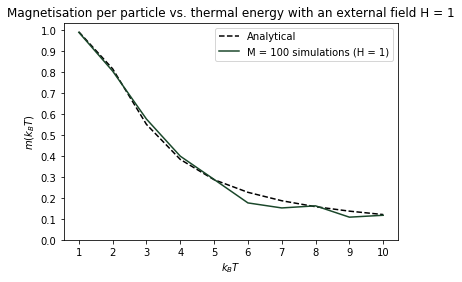

In [51]:
m_H2 = [Magnet1_ave_H2, Magnet2_ave_H2, Magnet3_ave_H2, Magnet4_ave_H2, Magnet5_ave_H2, Magnet6_ave_H2, Magnet7_ave_H2, Magnet8_ave_H2, Magnet9_ave_H2, Magnet10_ave_H2]  

m_x_H2 = [i * 1/N for i in m_H2]

plt.plot(Beta, ana_Mag(Beta, 1), label='Analytical', color = 'black', ls = '--')
plt.plot(Beta, m_x_H2, color = '#1a472a', label = 'M = 100 simulations (H = 1)') 
plt.title('Magnetisation per particle vs. thermal energy with an external field H = 1')


plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xticks(Beta)

plt.xlabel('$k_B T$')
plt.ylabel('$m(k_B T)$')

plt.savefig('1e3.png', bbox_inches='tight')

plt.legend()